In [9]:
import folium
import pandas as pd

data=pd.read_csv('/content/sample_data/Dataset1 .csv')

In [6]:
avg_lat = data['Latitude'].mean()
avg_lon = data['Longitude'].mean()
map_restaurants = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)
print("AVERAGE LATITUDE",avg_lat)
print("AVERAGE LONGITUDE",avg_lon)

AVERAGE LATITUDE 25.854380700074756
AVERAGE LONGITUDE 64.12657446168706


In [7]:
for _, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} - {row['City']}",
        icon=folium.Icon(color='blue', icon='cutlery', prefix='fa')
    ).add_to(map_restaurants)

In [8]:
map_restaurants.save("restaurant_map.html")
print("Map has been saved as 'restaurant_map.html'. Open this file in a browser to view the interactive map.")

Map has been saved as 'restaurant_map.html'. Open this file in a browser to view the interactive map.


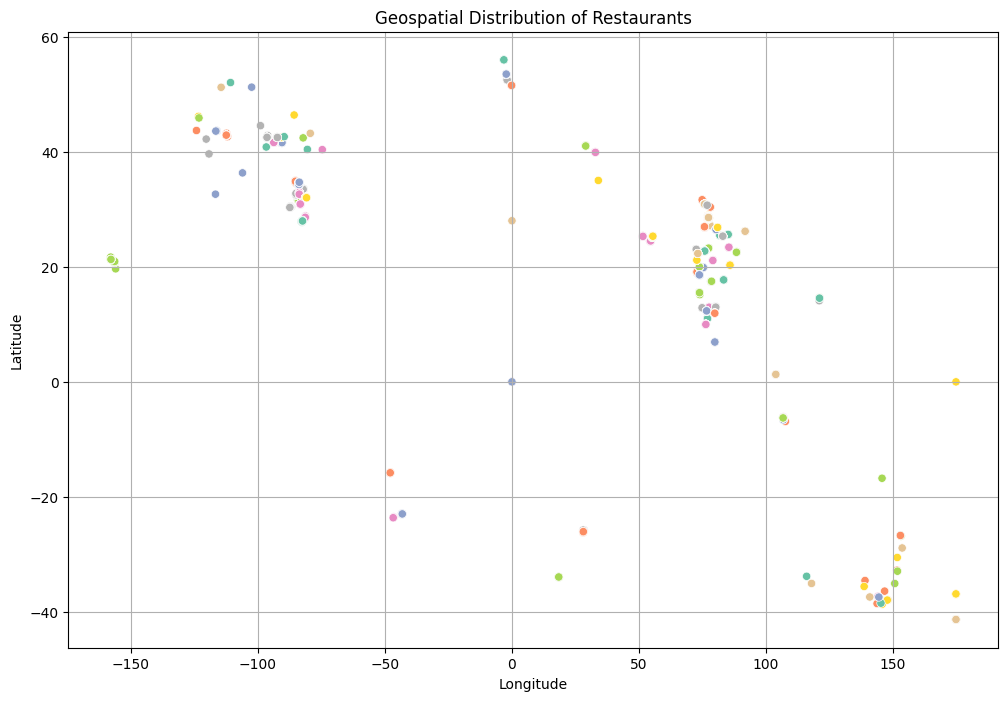

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=data, hue='City', palette='Set2', legend=False)
plt.title('Geospatial Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [14]:
from sklearn.cluster import KMeans
import numpy as np

# Extract coordinates for clustering
coordinates = data[['Latitude', 'Longitude']].dropna()
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
kmeans.fit(coordinates)

KMeans(n_clusters=5)

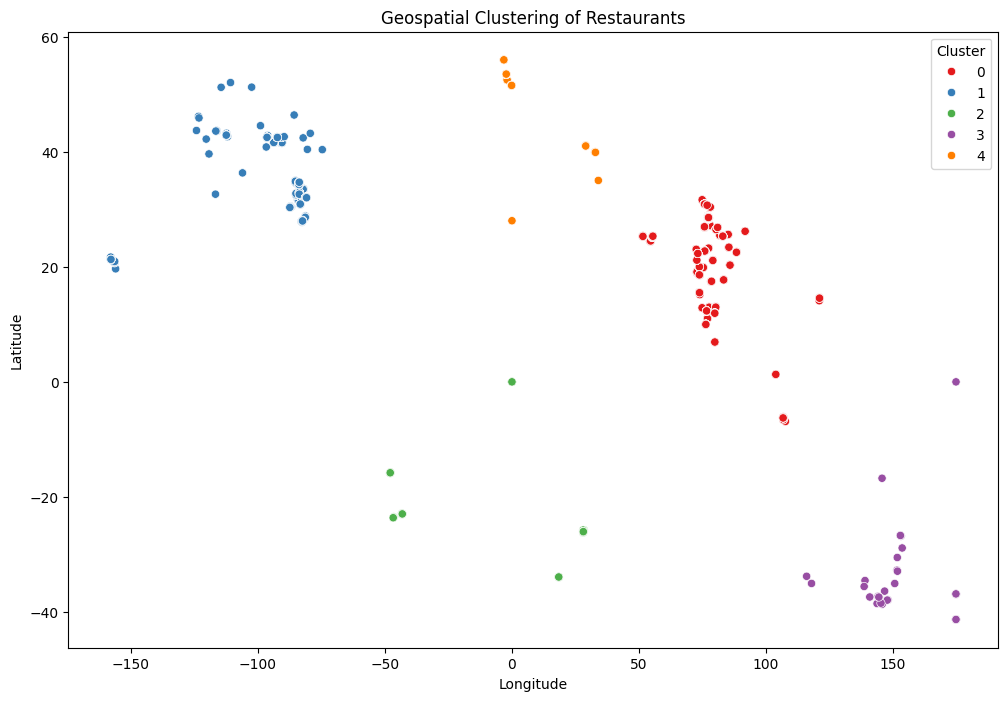

In [17]:
data['Cluster'] = kmeans.predict(data[['Latitude', 'Longitude']])
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=data, palette='Set1')
plt.title('Geospatial Clustering of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()